In [272]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

In [295]:
diabetes = load_diabetes()
X = diabetes.data[:, 2].reshape(-1, 1)  # BMI feature
y = diabetes.target

In [296]:
X.shape, y.shape

((442, 1), (442,))

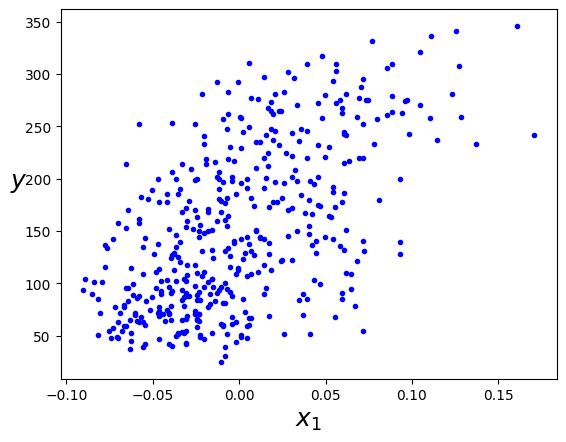

In [297]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# Normal Equation

In [307]:
X_b = np.c_[np.ones((len(X), 1)), X]
X_b.shape

(442, 2)

In [308]:
theta_ne = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_ne

array([152.13348416, 949.43526038])

In [309]:
y_pred_ne = X_b.dot(theta_ne)
y_pred_ne

array([210.71003806, 103.26219543, 194.33703347, 141.12476855,
       117.58857445, 113.4953233 , 107.35544658, 150.33458363,
       210.71003806, 189.22046954,  72.56281182, 168.7542138 ,
       124.75176395, 150.33458363, 127.82170232, 134.98489182,
       192.2904079 , 163.63764986, 142.14808133, 134.98489182,
        98.14563149, 130.89164068, 148.28795806, 209.68672528,
       186.15053118, 140.10145576,  78.70268854, 208.66341249,
       131.91495346, 146.24133248, 194.33703347,  89.9591292 ,
       271.0854925 , 104.28550821,  92.00575477, 122.70513838,
       173.87077773, 162.61433707, 219.91985315, 165.68427544,
       144.19470691,  87.91250362, 142.14808133, 129.86832789,
       216.84991479, 118.61188723, 141.12476855,  82.79593969,
       112.47201051, 165.68427544, 145.2180197 , 167.73090101,
       143.17139412, 137.0315174 , 175.91740331, 105.308821  ,
       191.26709511,  92.00575477,  90.98244198, 127.82170232,
       148.28795806, 156.47446035, 145.2180197 , 116.56

In [383]:
mse_ne = ((y- y_pred_ne)**2).mean()
mse_ne

np.float64(3890.456585461273)

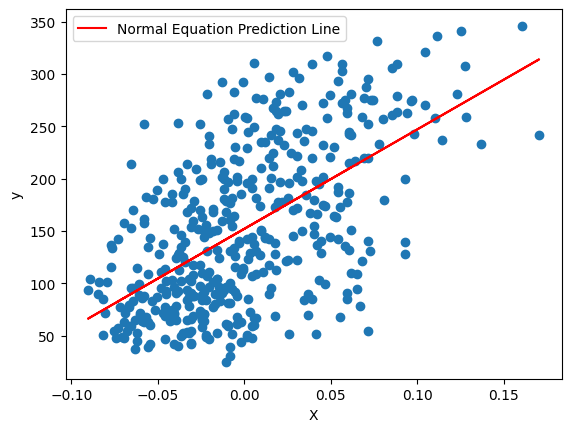

In [384]:
plt.scatter(X, y)
plt.plot(X, y_pred_ne, color="red", label="Normal Equation Prediction Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Linear Regression

In [385]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
w, b = lin_reg.coef_[0], lin_reg.intercept_
theta_lr = np.array([b, w])
theta_lr

array([152.13348416, 949.43526038])

In [386]:
y_pred_lr = lin_reg.predict(X)
y_pred_lr

array([210.71003806, 103.26219543, 194.33703347, 141.12476855,
       117.58857445, 113.4953233 , 107.35544658, 150.33458363,
       210.71003806, 189.22046954,  72.56281182, 168.7542138 ,
       124.75176395, 150.33458363, 127.82170232, 134.98489182,
       192.2904079 , 163.63764986, 142.14808133, 134.98489182,
        98.14563149, 130.89164068, 148.28795806, 209.68672528,
       186.15053118, 140.10145576,  78.70268854, 208.66341249,
       131.91495346, 146.24133248, 194.33703347,  89.9591292 ,
       271.0854925 , 104.28550821,  92.00575477, 122.70513838,
       173.87077773, 162.61433707, 219.91985315, 165.68427544,
       144.19470691,  87.91250362, 142.14808133, 129.86832789,
       216.84991479, 118.61188723, 141.12476855,  82.79593969,
       112.47201051, 165.68427544, 145.2180197 , 167.73090101,
       143.17139412, 137.0315174 , 175.91740331, 105.308821  ,
       191.26709511,  92.00575477,  90.98244198, 127.82170232,
       148.28795806, 156.47446035, 145.2180197 , 116.56

In [387]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y, y_pred_lr)
mse_lr

3890.456585461273

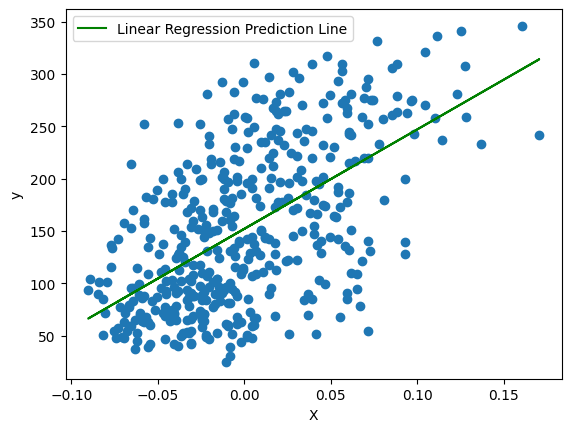

In [388]:
plt.scatter(X, y)
plt.plot(X, y_pred_lr, color="green", label="Linear Regression Prediction Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Gradient Descent

## Batch Gradient Descent

In [395]:
def calculate_gradient(lr=0.01, iters=10000):
    # parameters
    w_grad, b_grad = 0.0, 0.0
    costs = []
    
    for i in range(iters):
        # prediction
        theta_grad = np.array([b_grad, w_grad])
        y_pred_grad = X_b @ theta_grad
    
        # cost
        mse = np.mean((y - y_pred_grad) ** 2)
        costs.append(mse)
    
        # gradient (BATCH)
**        db, dw = grad
    
        # update
        w_grad -= lr * dw
        b_grad -= lr * db
    theta_grad = np.array([b_grad, w_grad])
    y_pred_grad = X_b.dot(theta_grad)
    mse_grad=costs[-1]
    return theta_grad, y_pred_grad, mse_grad

In [396]:
theta_grad, y_pred_grad, mse_grad = calculate_gradient()
theta_grad

array([152.13348416, 345.55953766])

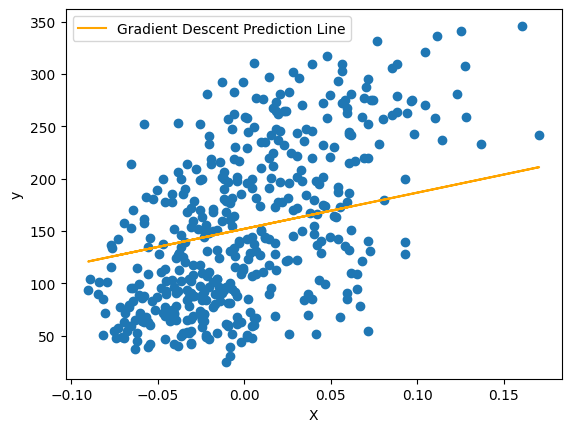

In [397]:
plt.scatter(X, y)
plt.plot(X, y_pred_grad, color="orange", label="Gradient Descent Prediction Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Stochastic Gradient Descent

In [418]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=20000, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel())

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",20000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [420]:
sgd_reg.intercept_, sgd_reg.coef_

(array([152.14468968]), array([815.90563754]))

In [447]:
# hyperparameters
lr = 0.01
epochs = 1000
n = len(X)
# parameters
w_sgd, b_sgd = 0.0, 0.0
costs_sgd = []

for epoch in range(epochs):
    # shuffle data each epoch
    indices = np.random.permutation(n)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for i in range(n):
        # single sample
        x_i = X_shuffled[i]
        x_b = np.array([1, x_i[0]])
        y_i = y_shuffled[i]
        theta = np.array([b_sgd, w_sgd])
        # prediction
        y_pred =  x_b.dot(theta)
        
        # gradients (SINGLE SAMPLE)
        db, dw = 2 * x_b.T.dot(y_pred - y_i)

        # update immediately
        w_sgd -= lr * dw
        b_sgd -= lr * db

    # cost after each epoch (for tracking)
    theta = np.array([b_sgd, w_sgd])
    y_pred_epoch = X_b.dot(theta)
    mse_epoch = np.mean((y - y_pred_epoch) ** 2)
    costs_sgd.append(mse_epoch)

theta_sgd = np.array([b_sgd, w_sgd])
y_pred_sgd = X_b.dot(theta_sgd)
mse_sgd = costs_sgd[-1]

theta_sgd, mse_sgd

(array([148.60986876, 948.44113764]), np.float64(3902.8746869179013))

## Mini-batch Gradient Descent

In [449]:
# hyperparameters
lr = 0.01
epochs = 1000
batch_size = 2

# parameters
w_mb, b_mb = 0.0, 0.0
costs_mb = []

for epoch in range(epochs):
    # shuffle every epoch
    indices = np.random.permutation(n)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    # mini-batches
    for start in range(0, n, batch_size):
        end = start + batch_size

        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        k = len(X_batch)

        # predictions (VECTOR)
        y_pred_batch = w_mb * X_batch + b_mb

        # gradients (MINI-BATCH)
        dw = (2/k) * np.sum((y_pred_batch - y_batch) * X_batch)
        db = (2/k) * np.sum(y_pred_batch - y_batch)

        # update
        w_mb -= lr * dw
        b_mb -= lr * db

    # cost per epoch (FULL DATA)
    y_pred_epoch = w_mb * X + b_mb
    mse_epoch = np.mean((y - y_pred_epoch) ** 2)
    costs_mb.append(mse_epoch)

theta_mb = np.array([b_mb, w_mb])
y_pred_mb = X_b.dot(theta_mb)
mse_mb = costs_mb[-1]

theta_mb, mse_mb

(array([153.0431543 , 472.46430847]), np.float64(6435.740728755335))

# Compare Normal Equation, Linear Regression, Gradient Descent 

In [450]:
def show_plots(lr=0.01, iters=10000):
    theta_grad, y_pred_grad, mse_grad = calculate_gradient(lr, iters)
    plt.scatter(X, y, alpha=0.5, color="blue", label="Data")
    plt.plot(X, y_pred_grad,
         color="orange",
         linestyle="--",
         linewidth=2,
         label=f"Gradient Descent (MSE={mse_grad:.2f})")
    plt.plot(X, y_pred_sgd,
         color="blue",
         linestyle=":",
         linewidth=3,
         label=f"Stochastic Gradient Descent (MSE={mse_sgd:.2f})")
    plt.plot(X, y_pred_mb,
         color="black",
         linestyle=":",
         linewidth=3,
         label=f"Mini-batch Gradient Descent (MSE={mse_mb:.2f})")
    plt.plot(X, y_pred_ne,
         color="green",
         linestyle="-.",
         linewidth=2,
         label=f"Normal Equation (MSE={mse_ne:.2f})")
    plt.plot(X, y_pred_lr,
         color="red",
         linestyle=":",
         linewidth=3,
         label=f"Linear Regression (MSE={mse_lr:.2f})")
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

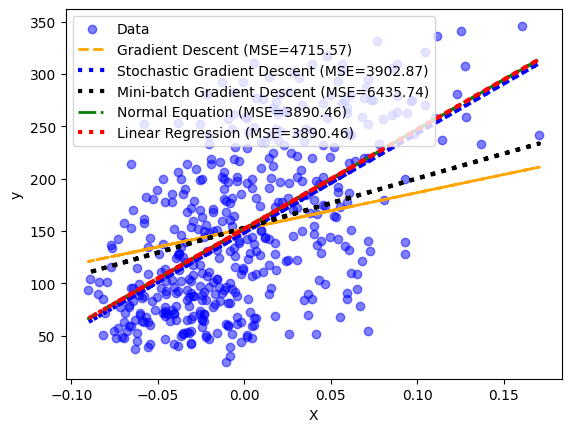

In [451]:
#When Learning Rate = 0.01, Iteration = 10000
show_plots()

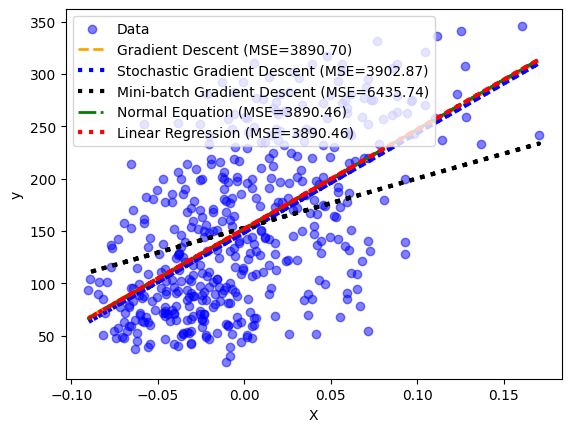

In [452]:
#When Learning Rate = 0.1, Iteration = 10000
show_plots(0.1, 10000)

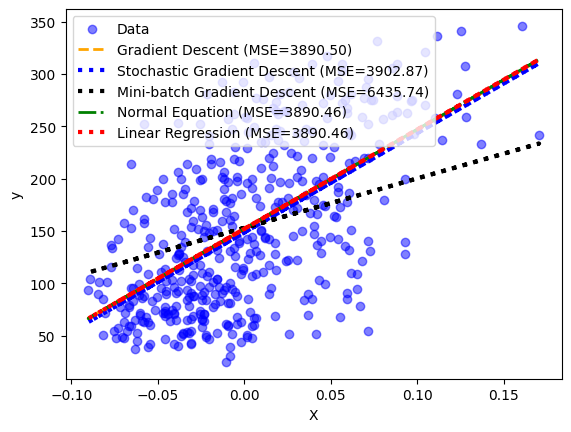

In [453]:
#When Learning Rate = 0.1, Iteration = 12000
show_plots(0.1, 12000)

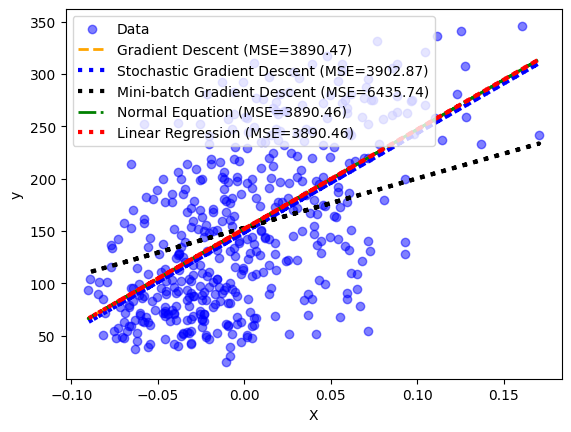

In [454]:
#When Learning Rate = 0.1, Iteration = 13000
show_plots(0.1, 13000)

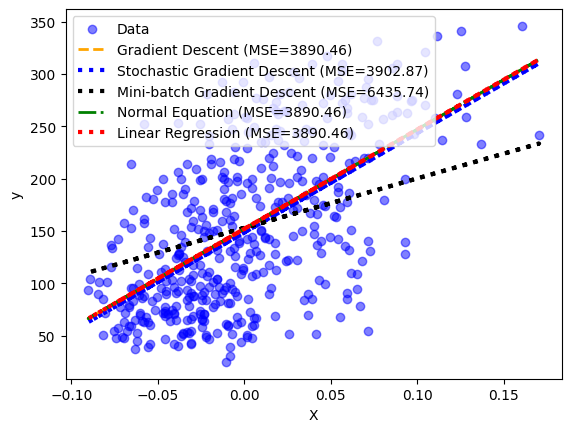

In [455]:
#When Learning Rate = 0.1, Iteration = 14000
show_plots(0.1, 14000)